In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.stats.multitest as smm

In [2]:
ROOT = '/data1/wgs_APA/validation_res/'
GEM0 = 'gem0/'
GEM1 = 'gem1/'
MAAPER_OUT = 'MAAPER_out/'

In [3]:
data_dir = '/data1/wgs_APA/MAAPER_out'
genes_dirs = os.listdir(data_dir)

genes_pas = {}
for gene in genes_dirs:
    try:
        gene_name = gene.split('_')[0]
        gene_pas = pd.read_csv(data_dir + "/" + gene + '/gene.txt' ,sep='\t', index_col=0)
        genes_pas[gene_name] = gene_pas
    except:
        continue
    
shapes = []
for pgene in genes_pas:
    print(pgene)
    shapes.append(genes_pas[pgene].shape)

# for each gene in genes_pas, lets filter the genes_pas['gene'] to only keep rows with npas > 1

genes_pas_filtered = {}
for gene in genes_pas:
    genes_pas_filtered[gene] = genes_pas[gene][genes_pas[gene]['npas'] > 1]

CD8B
ZNF589
BYSL
IP6K2
EBF2
MEIS2
BUD23
NOS1AP
MYF6
TARBP2
SPECC1
RBM6
TRAPPC1
SF3B2
RPS6KA1
LARP1
PRKCB
COA4
METTL9
CMIP
NR2C1
PTTG1IP
ITPR3
PXMP4
ZNF544
VPS8
TRIM58
ZCCHC8
MAST4
PTOV1
FKBP15
DHRSX
ARL5A
ZER1
NMD3
NUDT4
RPIA
THUMPD1
PTPN23
NCAPH2
ZNF613
TMEM192
PCGF3
PRG2
MPLKIP
RRP8
TMEM243
LIN9
JUNB
SFMBT1
CHMP5
SNX11
LIN28B
UFL1
SLC25A25
RFX2
EIF4A2
FGD6
PSMA4
FBXO8
TOLLIP
NECAP2
APH1A
E2F8
MON1B
ZFP42
TRIM38
OR1D2
ARL6IP1
UBXN2B
THEM4
LYPLAL1
PMM2
FBXO21
SAV1
PTPN12
CUL4B
TMEM164
TRERF1
CRYZL1
TJP2
R3HDM1
USP14
SEPTIN6
KIAA0355
IVNS1ABP
GABARAPL2
ZNF131
P4HA2
GATA4
CLK3
SPRED1
MPC1
TMCO3
MBOAT2
ZBTB11
EHD1
GBE1
SFT2D1
ZC3H7A
PTPRG
CTXN1
PDHX
KRCC1
DEDD
PAQR3
LARP4B
INTS13
MCM8
PLXND1
ARV1
CTDP1
BHLHE41
GULP1
INO80B
TMEM80
FBXW7
SLC6A8
SLC39A6
ZDHHC20
TOP1
KLF14
WDFY2
SON
BRD1
GRTP1
NKX3-2
ETV6
ZFP69B
NPRL2
NADK2
TRIP6
MRM2
METTL5
SARS2
POLR3GL
GNL1
CCDC169-SOHLH2
KDM8
CYP3A5
UBN1
ATP7A
KDELR3
NR1H3
C6orf15
CRK
TTC13
ZNF35
MAFF
ZNF517
KIF1B
NAGA
SDCBP
TMBIM4
SSNA1
LGMN
CNTRL
PASD1


In [21]:
tst = genes_pas_filtered['PRMT5']
tst

,npas,pval,RLDu,RLDi,REDu,REDu.pval,REDi,REDi.pval,nread.c1.1,nread.c2.1
gene,,,,,,,,,,
ACTB,2,0.00952,-0.1070,NaN,-1.3000,0.00183,NaN,NaN,13338,140
ACTR2,6,0.00026,-0.4180,NaN,-36.0000,0.00175,NaN,NaN,1214,23
ALDOA,3,0.56700,0.0949,-1.380,6.1500,0.25900,-7.410,0.084200,7187,39
ALYREF,2,1.00000,0.0197,NaN,0.2380,0.73000,NaN,NaN,1383,26
ANP32B,4,0.27600,-0.2930,-0.668,-0.4760,0.17400,-0.781,0.025500,6684,104
...,...,...,...,...,...,...,...,...,...,...
YBX1,3,0.00607,-0.2450,-0.815,-0.1710,0.46000,-0.897,0.000283,22134,245
YWHAB,7,1.00000,-0.2470,-0.556,-0.0775,1.00000,-0.833,0.642000,2379,38
YWHAE,4,0.17200,-0.5010,-1.280,-1.4300,0.06970,-2.040,0.006720,2164,30


False

In [14]:
rbp_df = pd.read_csv('/home/aiden/codes/APA_stuff/post_qual/APA/For_ALS_atlas_paper/all_rbp_hits.txt', sep='\t', header=None)
rbp_df.columns = ['rbp_name']
rbp_df.head()

,rbp_name
0,RBM46
1,SHEP
2,SNRNP70
3,Syncrip
4,Tv_0236


In [1]:
def get_affected_genes_num(gene):
    global genes_pas
    tmp = genes_pas[gene]
    # remove NAs on REDu columns
    tmp = tmp[~tmp['REDu'].isna()]
    # keep significant rows based on REDu.pval column
    tmp = tmp[tmp['REDu.pval'] < 0.05]
    tmp_positive = tmp[tmp['REDu'] > 0]
    tmp_negative = tmp[tmp['REDu'] < 0]

    return (tmp_positive.shape[0], tmp_positive['REDu'].median()), (tmp_negative.shape[0], tmp_negative['REDu'].median())

NameError: name 'os' is not defined

In [16]:
results = []
for gene in rbp_df['rbp_name']:
    # Call your function
    try:
        positive_info, negative_info = get_affected_genes_num(gene) 
        # Create a dictionary for this gene
        gene_dict = {
            'Gene': gene,
            'lengthened_genes': positive_info[0],
            'distal_APA_effect': positive_info[1],
            'shortened_genes': negative_info[0],
            'proximal_APA_effect': negative_info[1]
        }
        
        # Append to results
        results.append(gene_dict)
    except:
        continue

# Convert list of dictionaries to DataFrame
JW_df_rbp = pd.DataFrame(results)

# Display DataFrame
JW_df_rbp

,Gene,lengthened_genes,distal_APA_effect,shortened_genes,proximal_APA_effect
0,SNRNP70,2,2.910,20,-3.600
1,QKI,37,2.980,54,-2.345
2,ZC3H14,35,6.450,34,-5.690
3,PABPN1,5,3.810,25,-3.190
4,SRSF7,16,1.990,21,-2.680
5,IGF2BP3,25,6.610,28,-5.355
6,MATR3,36,2.070,31,-2.460
7,RBM38,26,10.850,2,-4.470
8,YBX1,28,2.725,11,-3.190
9,RBM4,48,4.490,23,-2.300


In [43]:
def plot_APA_effect(df, redu=False):
    # Sort DataFrame first based on shortened genes in descending order and then based on lengthened genes also in descending order
    df = df.sort_values(by=['shortened_genes', 'lengthened_genes'], ascending=[False, False])

    # Values for plotting
    genes = df['Gene']
    lengthened_genes = df['lengthened_genes']
    shortened_genes = df['shortened_genes']
    distal_APA_effects = df['distal_APA_effect']
    proximal_APA_effects = df['proximal_APA_effect']

    # Create a new figure and set the size
    plt.figure(figsize=(20, 8))

    # Create bar plots
    # Bar plots for lengthened genes on top
    plt.bar(genes, lengthened_genes, color='#4CAF50', label='Lengthened Genes')  # Using green-ish color

    # Bar plots for shortened genes on the bottom
    plt.bar(genes, -np.array(shortened_genes), color='#FF5733', label='Shortened Genes')  # Using red-ish color

    # Adding labels and title
    plt.xlabel('Genes')
    plt.ylabel('Counts (Absolute Value)')
    plt.title('Lengthened and Shortened Genes by APA Effect')

    # Customize y-ticks to show as positive
    yticks = plt.yticks()[0]
    plt.yticks(yticks, [str(abs(int(y))) for y in yticks])

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

    # Adding legend
    plt.legend()

    # # Show APA effect labels on each bar
    if redu:
        for i, (lg, sg, da, pa) in enumerate(zip(lengthened_genes, shortened_genes, distal_APA_effects, proximal_APA_effects)):
            plt.text(i, lg, f"{da:.2f}", ha='center', va='bottom', size=10)
            plt.text(i, -sg, f"{pa:.2f}", ha='center', va='top', size=10)

    # Tight layout to ensure everything fits
    plt.tight_layout()

    # Display the plot
    plt.show()


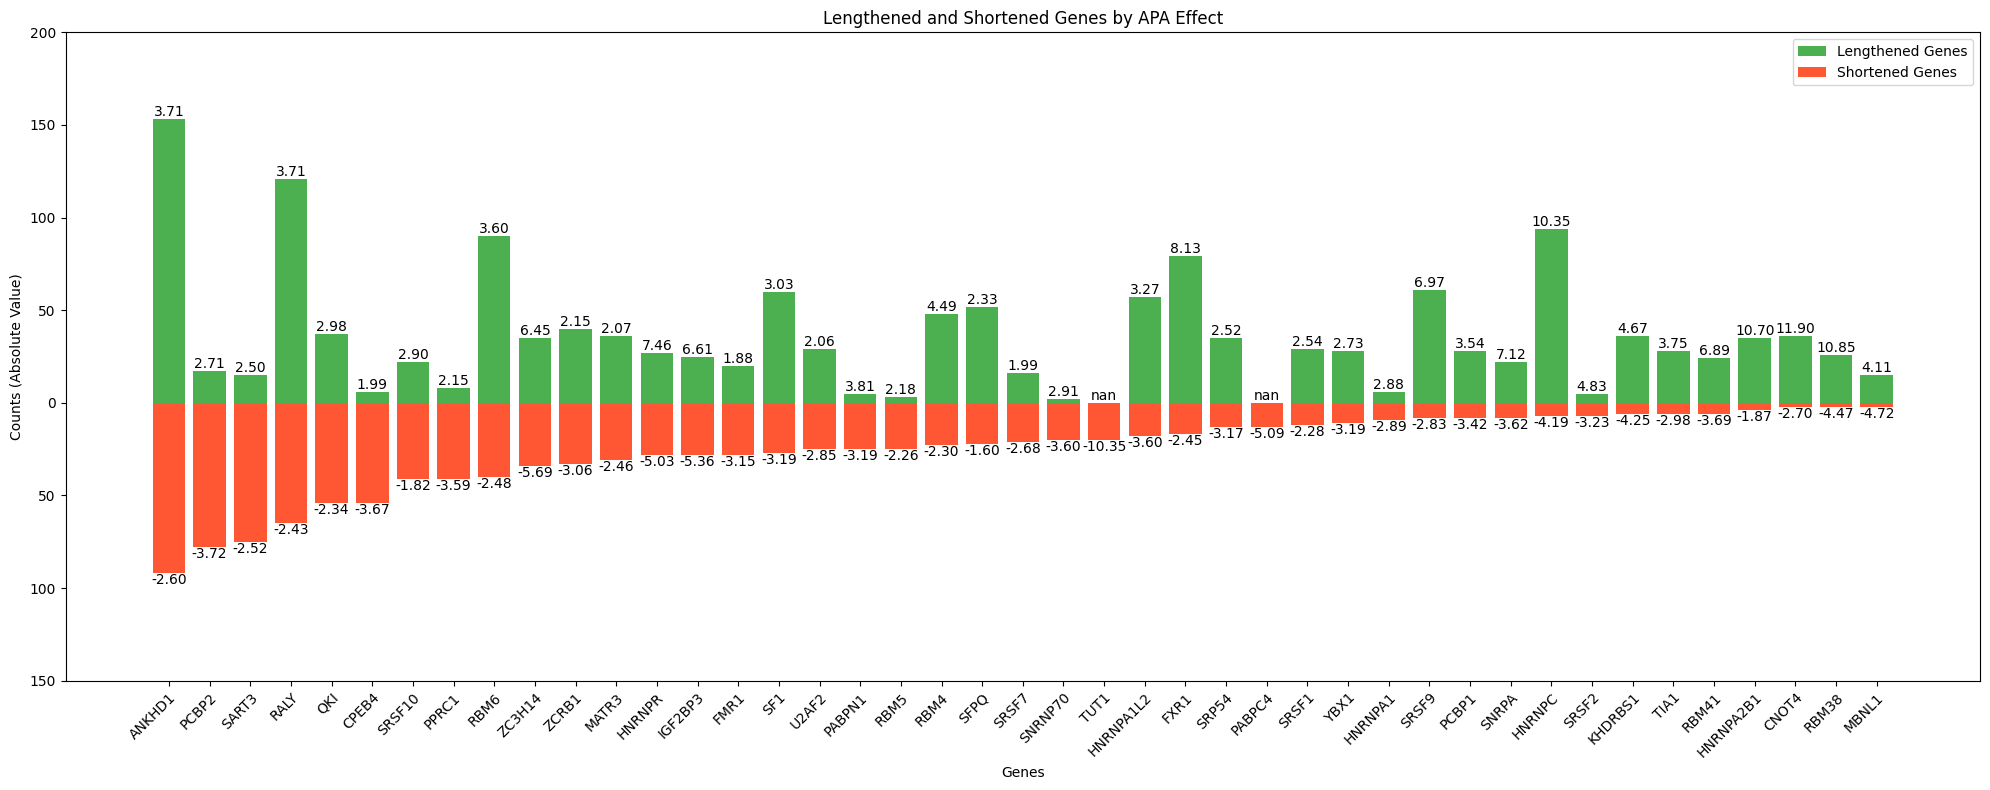

In [34]:
df = JW_df_rbp.copy()
# Sort DataFrame first based on shortened genes in descending order and then based on lengthened genes also in descending order
df = df.sort_values(by=['shortened_genes', 'lengthened_genes'], ascending=[False, False])

# Values for plotting
genes = df['Gene']
lengthened_genes = df['lengthened_genes']
shortened_genes = df['shortened_genes']
distal_APA_effects = df['distal_APA_effect']
proximal_APA_effects = df['proximal_APA_effect']

# Create a new figure and set the size
plt.figure(figsize=(20, 8))

# Create bar plots
# Bar plots for lengthened genes on top
plt.bar(genes, lengthened_genes, color='#4CAF50', label='Lengthened Genes')  # Using green-ish color

# Bar plots for shortened genes on the bottom
plt.bar(genes, -np.array(shortened_genes), color='#FF5733', label='Shortened Genes')  # Using red-ish color

# Adding labels and title
plt.xlabel('Genes')
plt.ylabel('Counts (Absolute Value)')
plt.title('Lengthened and Shortened Genes by APA Effect')

# Customize y-ticks to show as positive
yticks = plt.yticks()[0]
plt.yticks(yticks, [str(abs(int(y))) for y in yticks])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

# Adding legend
plt.legend()

# Show APA effect labels on each bar
for i, (lg, sg, da, pa) in enumerate(zip(lengthened_genes, shortened_genes, distal_APA_effects, proximal_APA_effects)):
    plt.text(i, lg, f"{da:.2f}", ha='center', va='bottom', size=10)
    plt.text(i, -sg, f"{pa:.2f}", ha='center', va='top', size=10)

# Tight layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()


In [31]:
tf_df = pd.read_csv('For_perturb_seq/DatabaseExtract_v_1.01.csv', index_col=0)
tf_df = tf_df[tf_df['Is TF?']=='Yes']
tf_df.head()

,Ensembl ID,HGNC symbol,DBD,Is TF?,TF assessment,Binding mode,Motif status,Final Notes,Final Comments,Interpro ID(s),...,CisBP considers it a TF?,TFCat classification,Is a GO TF?,Initial assessment,Curator 1,Curator 2,TFclass considers it a TF?,Go Evidence,Pfam Domains (By ENSP ID),Is C2H2 ZF(KRAB)?
0,ENSG00000137203,TFAP2A,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,NaN,NaN,IPR008121;IPR013854,...,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin...,Yes,"1a1, Direct HQ evidence",Sam Lambert,Yimeng Yin,Yes,$#ENSG00000137203#GO:0000981#sequence-specific...,$#ENSP00000368928#ENSG00000137203#ENST00000379...,False
1,ENSG00000008196,TFAP2B,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,NaN,NaN,IPR008122;IPR013854,...,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin...,Yes,"1a1, Direct HQ evidence",Matt Weirauch,Yimeng Yin,Yes,$#ENSG00000008196#GO:0000981#sequence-specific...,$#ENSP00000377265#ENSG00000008196#ENST00000393...,False
2,ENSG00000087510,TFAP2C,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,NaN,NaN,IPR008123;IPR013854,...,Yes,No,Yes,"1a1, Direct HQ evidence",Matt Weirauch,Yimeng Yin,Yes,$#ENSG00000087510#GO:0001077#RNA polymerase II...,$#ENSP00000201031#ENSG00000087510#ENST00000201...,False
3,ENSG00000008197,TFAP2D,AP-2,Yes,Known motif,Monomer or homomultimer,In vivo/Misc source,Only known motifs are from Transfac or HocoMoc...,Binds the same GCCTGAGGC sequence as the other...,IPR013854;,...,Yes,No,Yes,"2a1, Lower confidence direct evidence",Arttu Jolma,Sam Lambert,Yes,$#ENSG00000008197#GO:0000981#sequence-specific...,$#ENSP00000008391#ENSG00000008197#ENST00000008...,False
4,ENSG00000116819,TFAP2E,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,NaN,NaN,IPR013854;,...,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin...,Yes,"1a1, Direct HQ evidence",Sam Lambert,Laura Campitelli,Yes,$#ENSG00000116819#GO:0000981#sequence-specific...,$#ENSP00000362332#ENSG00000116819#ENST00000373...,False


In [32]:
tf_df.shape

(1639, 28)

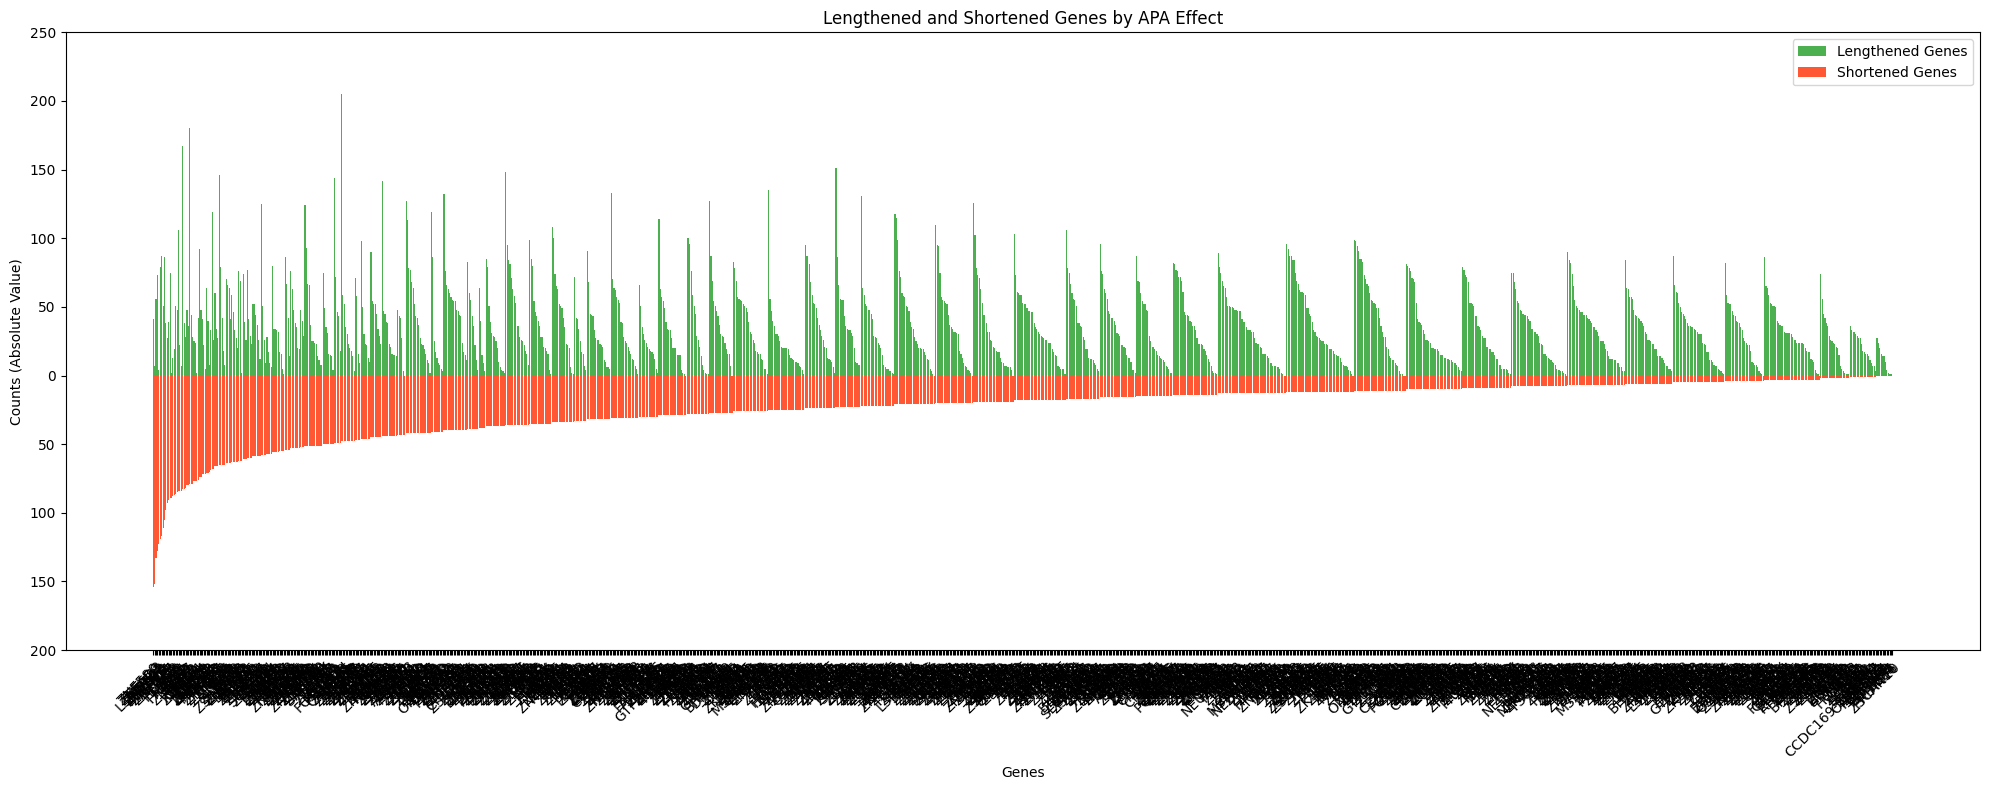

In [38]:
results = []
for gene in tf_df['HGNC symbol']:
    # Call your function
    try:
        positive_info, negative_info = get_affected_genes_num(gene) 
        # Create a dictionary for this gene
        gene_dict = {
            'Gene': gene,
            'lengthened_genes': positive_info[0],
            'distal_APA_effect': positive_info[1],
            'shortened_genes': negative_info[0],
            'proximal_APA_effect': negative_info[1]
        }
        
        # Append to results
        results.append(gene_dict)
    except:
        continue

# Convert list of dictionaries to DataFrame
JW_df_TF = pd.DataFrame(results)

# Display DataFrame
plot_APA_effect(JW_df_TF)

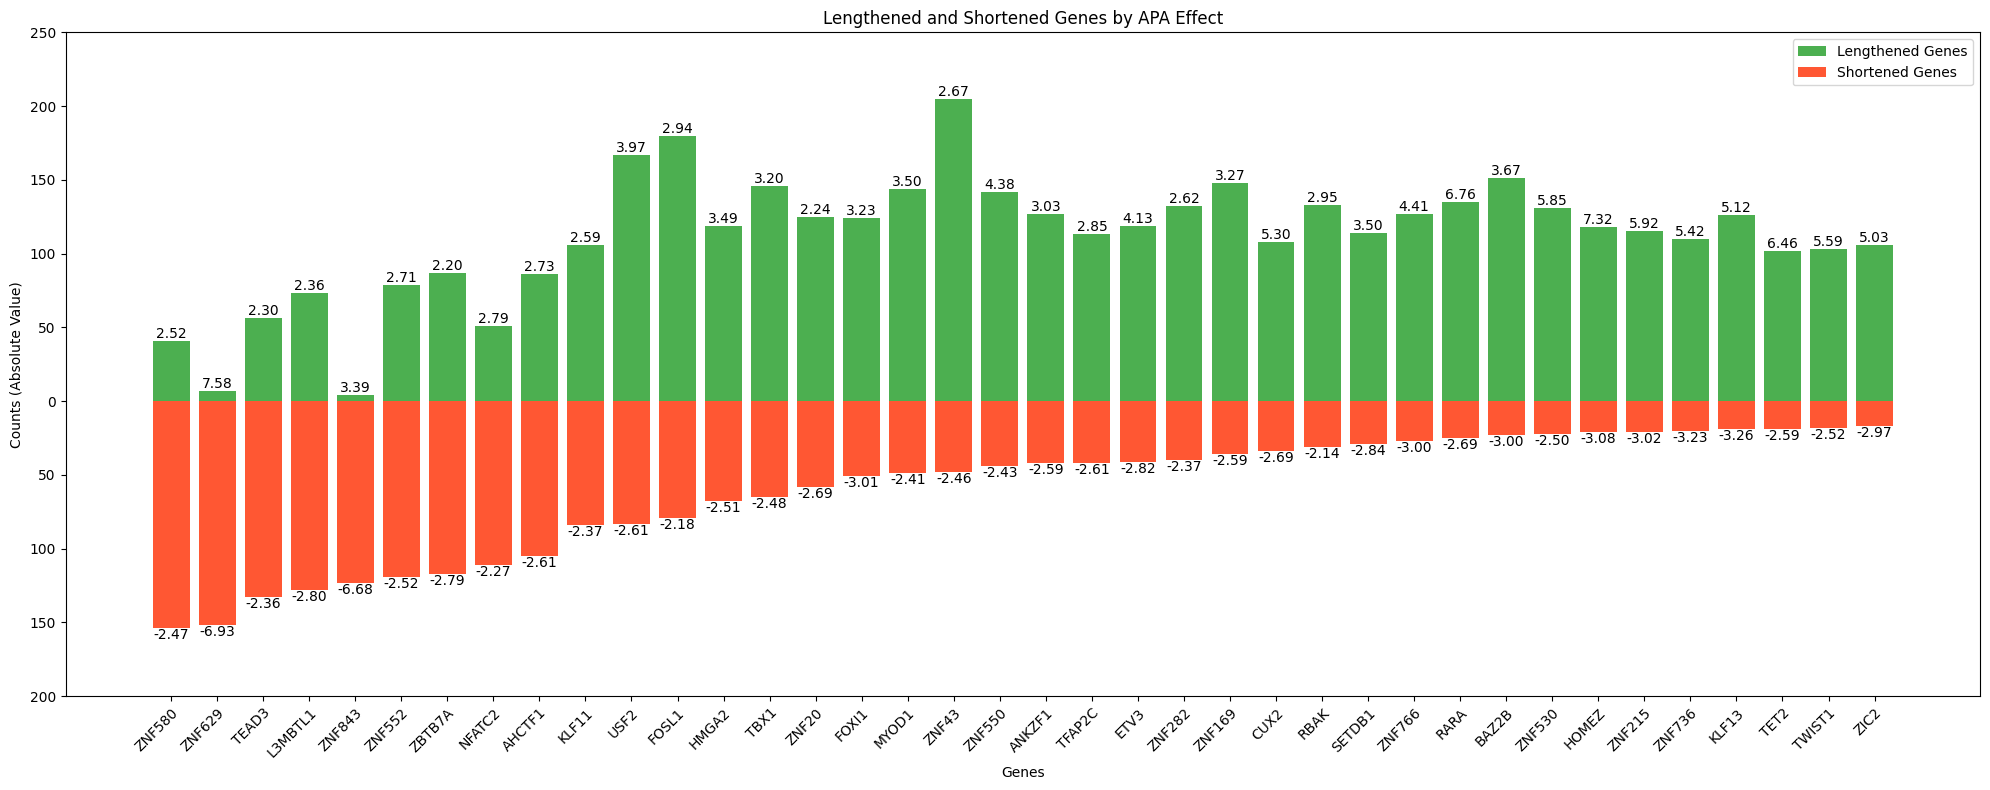

In [44]:
# filter lengthened_genes > 50 or shortened_genes > 50
JW_df_TF_filtered = JW_df_TF[(JW_df_TF['lengthened_genes'] > 100) | (JW_df_TF['shortened_genes'] > 100)]
plot_APA_effect(JW_df_TF_filtered, redu=True)

In [9]:
results = []
for gene in ['PRMT5']:
    # Call your function
    try:
        positive_info, negative_info = get_affected_genes_num(gene) 
        # Create a dictionary for this gene
        gene_dict = {
            'Gene': gene,
            'lengthened_genes': positive_info[0],
            'distal_APA_effect': positive_info[1],
            'shortened_genes': negative_info[0],
            'proximal_APA_effect': negative_info[1]
        }
        
        # Append to results
        results.append(gene_dict)
    except:
        continue

# Convert list of dictionaries to DataFrame
JW_df_rbp = pd.DataFrame(results)

# Display DataFrame
JW_df_rbp

,Gene,lengthened_genes,distal_APA_effect,shortened_genes,proximal_APA_effect
0,PRMT5,35,2.4,52,-3.26


In [7]:
get_affected_genes_num('PRMT5') 

NameError: name 'get_affected_genes_num' is not defined